## Extract the dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data exploration

In [ ]:
data = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##Data Cleaning

In [ ]:
data['native-country'] = data['native-country'].str.strip()

##Replace '?' with NaN

In [ ]:
data.replace(r'\?', np.NaN, regex=True, inplace=True)

In [ ]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


##Fill in with the mode

In [ ]:
data.fillna(data.mode().iloc[0], inplace=True)

In [ ]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
print(data['income'].unique())
data['income'] = data['income'].str.replace('.', '')
print(data['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


<ipython-input-16-da2fafb2af08>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['income'] = data['income'].str.replace('.', '')


In [ ]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

###Fix Skewness

In [ ]:
data['capital-gain'] = np.log1p(data['capital-gain'])
data['capital-loss'] = np.log1p(data['capital-loss'])

##Encoding

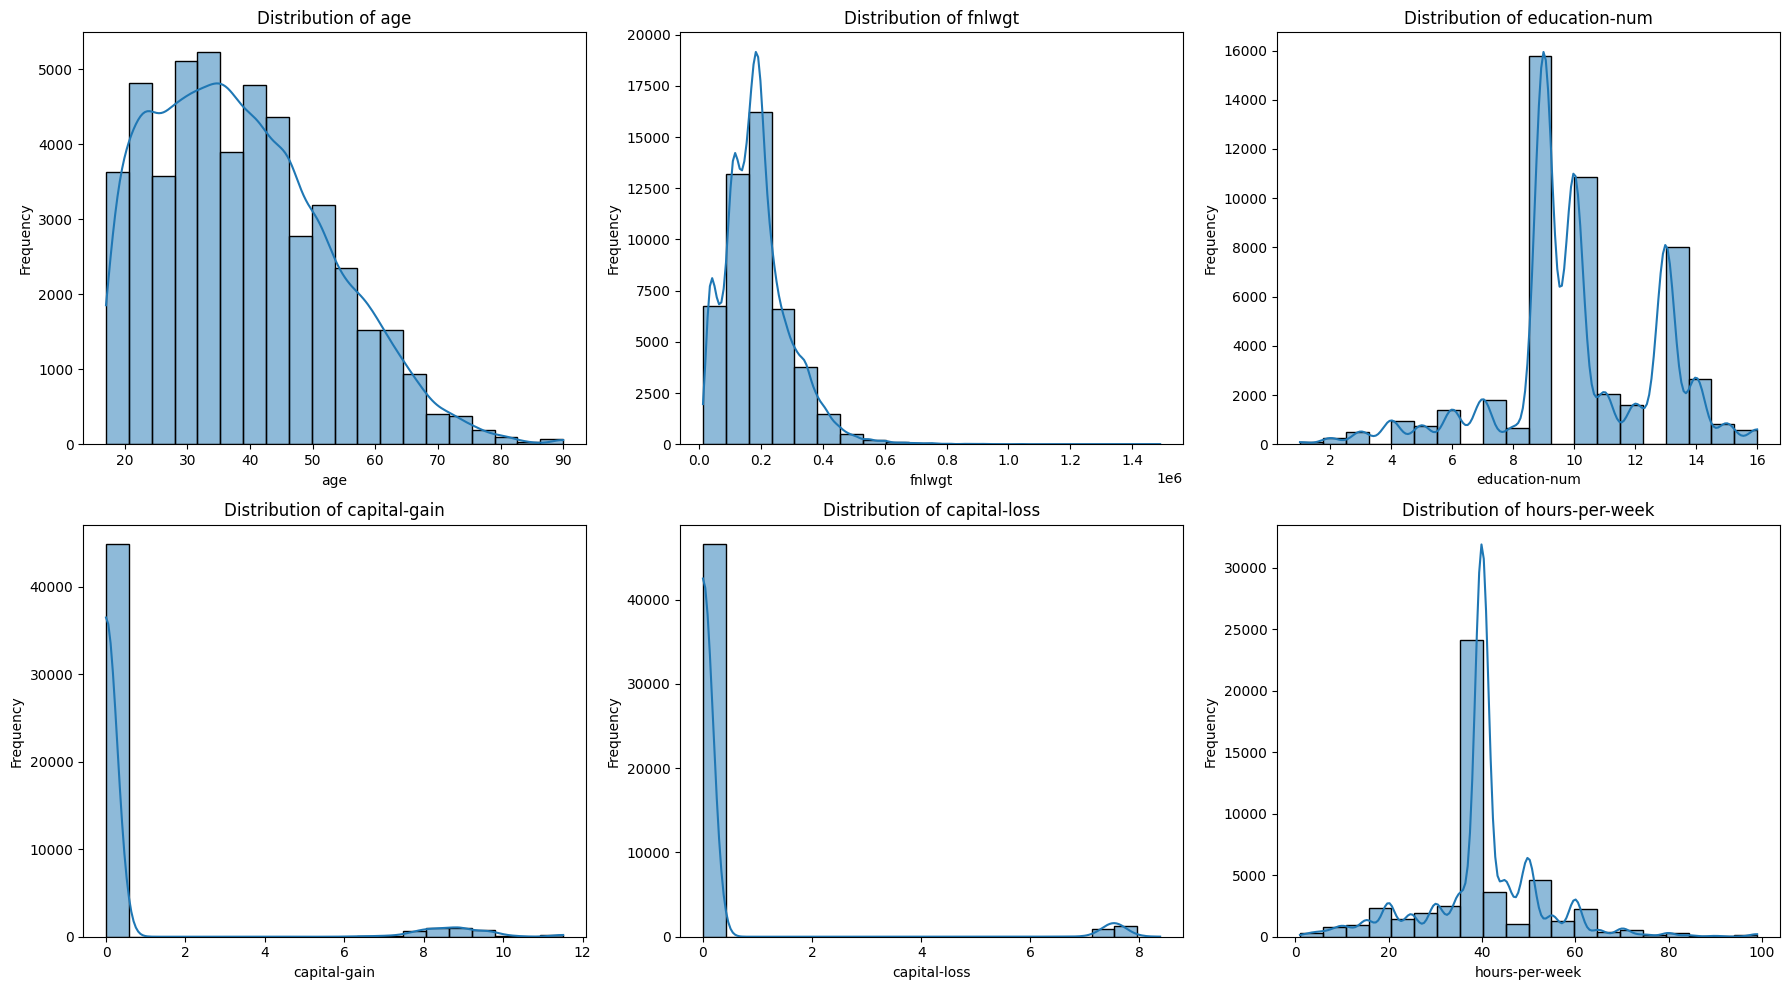

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

numerical_variables = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for i, var in enumerate(numerical_variables, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


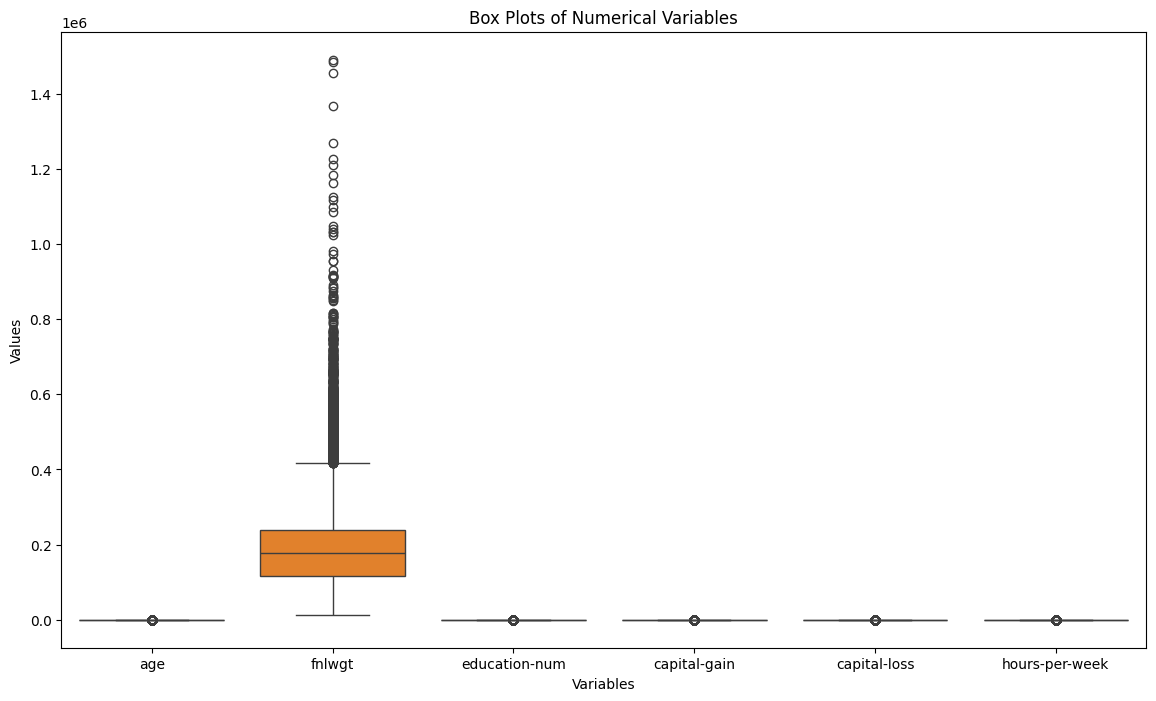

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_vars])
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


In [ ]:
data.drop(columns=['fnlwgt'], inplace=True)

##Encoding

###WorkClass


In [ ]:
print(data['workclass'].value_counts())

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


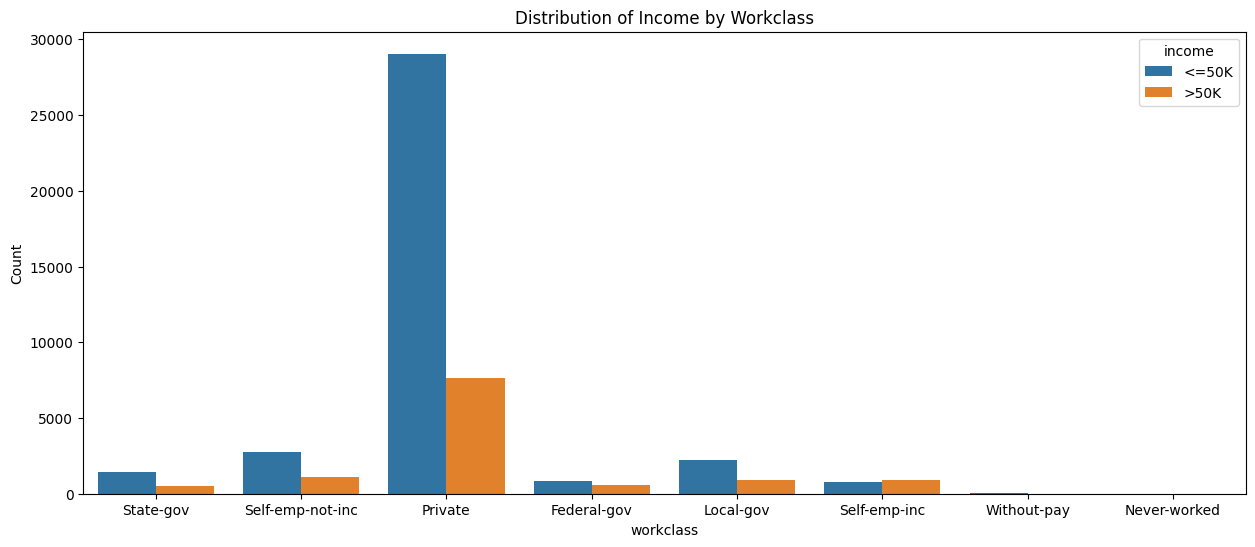

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="workclass", hue="income", data=data)

plt.xlabel("workclass")
plt.ylabel("Count")
plt.title("Distribution of Income by Workclass")
plt.show()

In [ ]:
workclass_mapping = {
    'Private': 1,
    'Self-emp-not-inc': 2,
    'Local-gov': 3,
    'State-gov': 4,
    'Self-emp-inc': 5,
    'Federal-gov': 6,
    'Without-pay': 7,
    'Never-worked': 8
}

In [ ]:
data['workclass'] = data['workclass'].map(workclass_mapping)

In [ ]:
data['workclass'].unique()

array([4, 2, 1, 6, 3, 5, 7, 8])

###Education

In [ ]:
print(data['education'].value_counts())

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


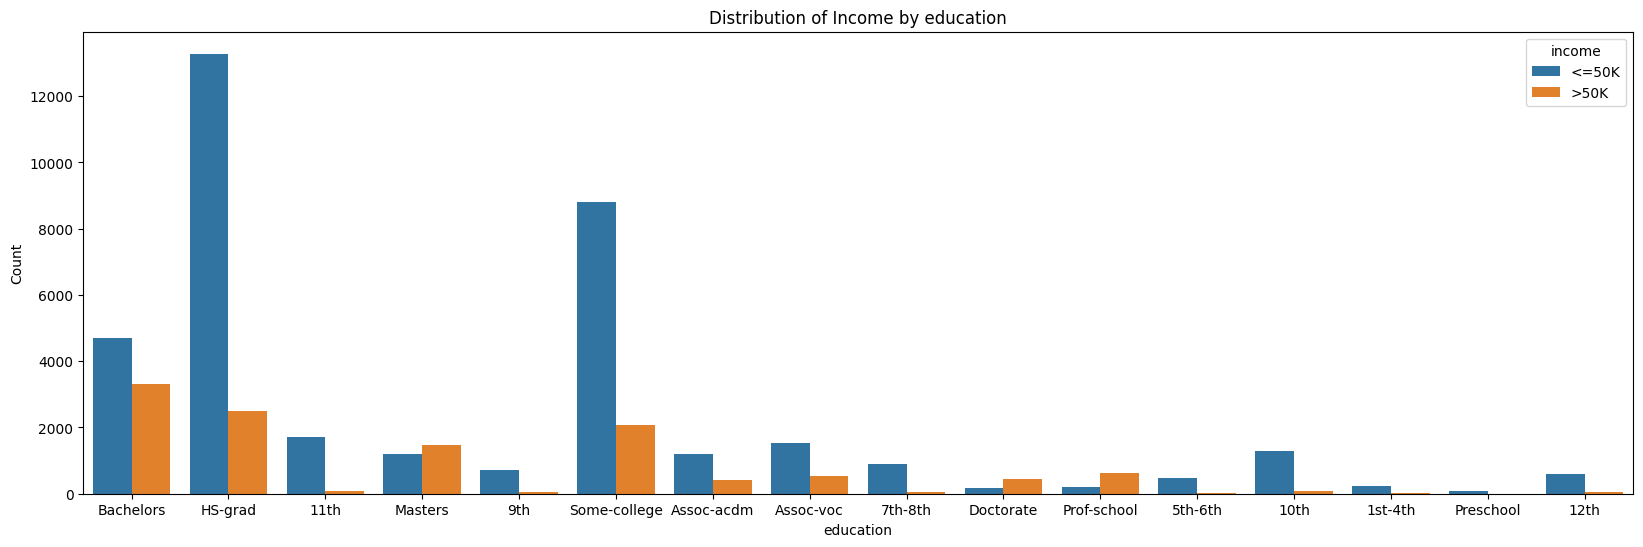

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="education", hue="income", data=data)

plt.xlabel("education")
plt.ylabel("Count")
plt.title("Distribution of Income by education")
plt.show()

In [ ]:
education_mapping = {
    'HS-grad': 1,
    'Some-college': 2,
    'Bachelors': 3,
    'Masters': 4,
    'Assoc-voc': 5,
    '11th': 6,
    'Assoc-acdm': 7,
    '10th': 8,
    '7th-8th': 9,
    'Prof-school': 10,
    '9th': 11,
    '12th': 12,
    'Doctorate': 13,
    '5th-6th': 14,
    '1st-4th': 15,
    'Preschool': 16
}

In [ ]:
data['education'] = data['education'].map(education_mapping)

###Marital Status

In [ ]:
print(data['marital-status'].value_counts())

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


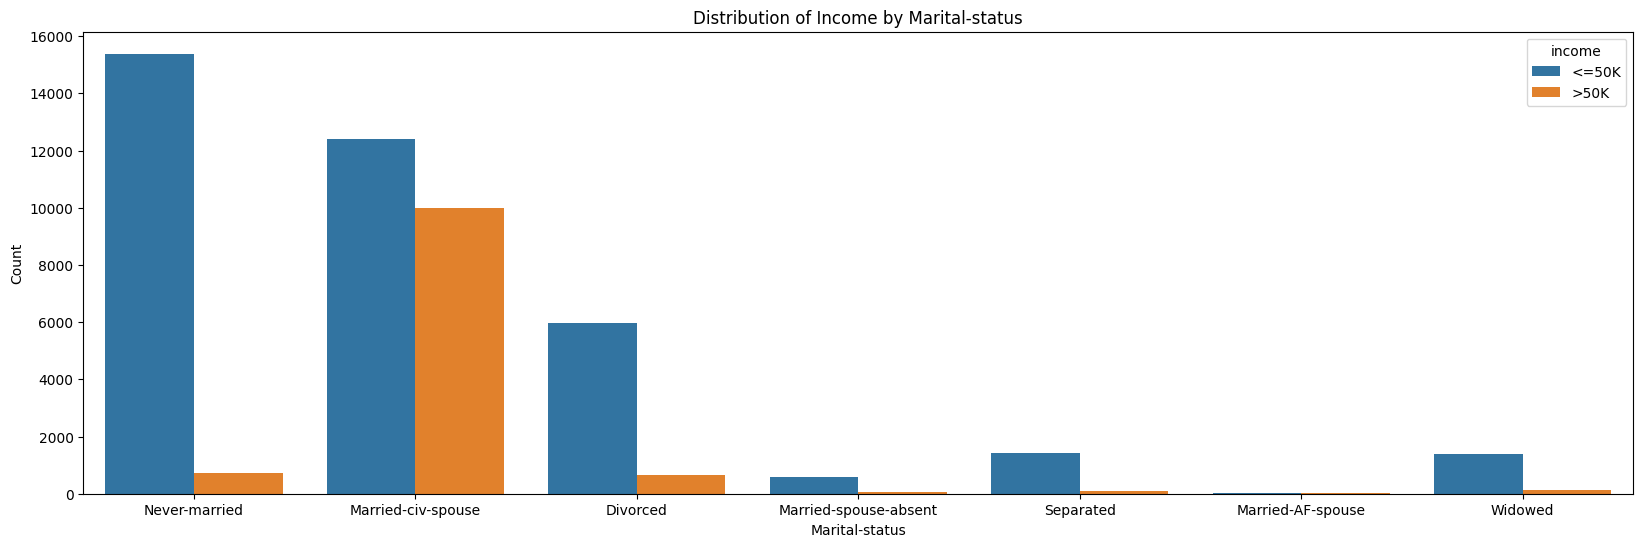

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="marital-status", hue="income", data=data)

plt.xlabel("Marital-status")
plt.ylabel("Count")
plt.title("Distribution of Income by Marital-status")
plt.show()

In [ ]:
marital_status_mapping = {
    'Married-civ-spouse': 0,
    'Never-married': 1,
    'Divorced': 2,
    'Widowed': 3,
    'Separated': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
}

In [ ]:
data['marital-status'] = data['marital-status'].map(marital_status_mapping)

###Occupation

In [ ]:
print(data['occupation'].value_counts())

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


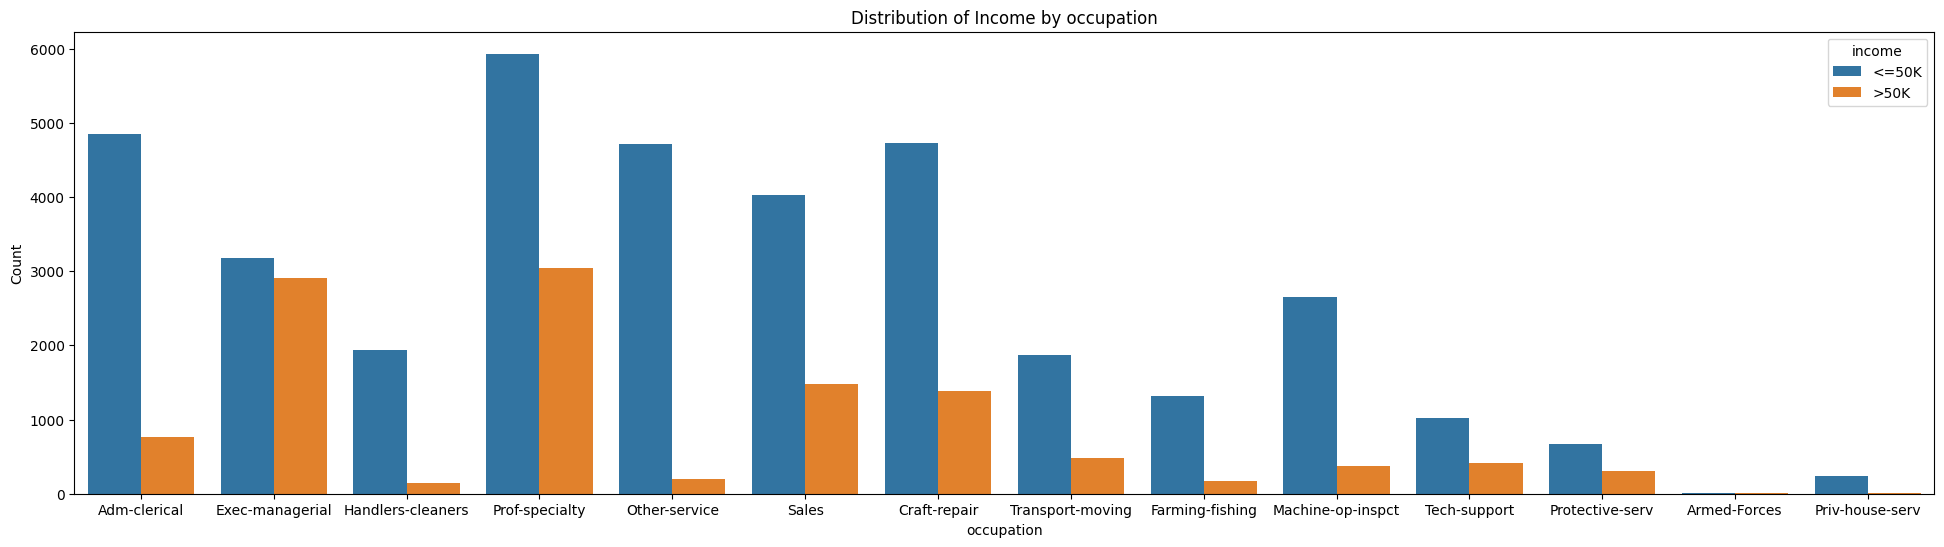

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(x="occupation", hue="income", data=data)

plt.xlabel("occupation")
plt.ylabel("Count")
plt.title("Distribution of Income by occupation")
plt.show()

In [ ]:
occupation_mapping = {
    'Prof-specialty': 0,
    'Exec-managerial': 1,
    'Craft-repair': 2,
    'Sales': 3,
    'Adm-clerical': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Tech-support': 9,
    'Farming-fishing': 10,
    'Protective-serv': 11,
    'Priv-house-serv': 12,
    'Armed-Forces': 13
}


In [ ]:
data['occupation'] = data['occupation'].map(occupation_mapping)

###Relationship

In [ ]:
print(data['relationship'].value_counts())

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


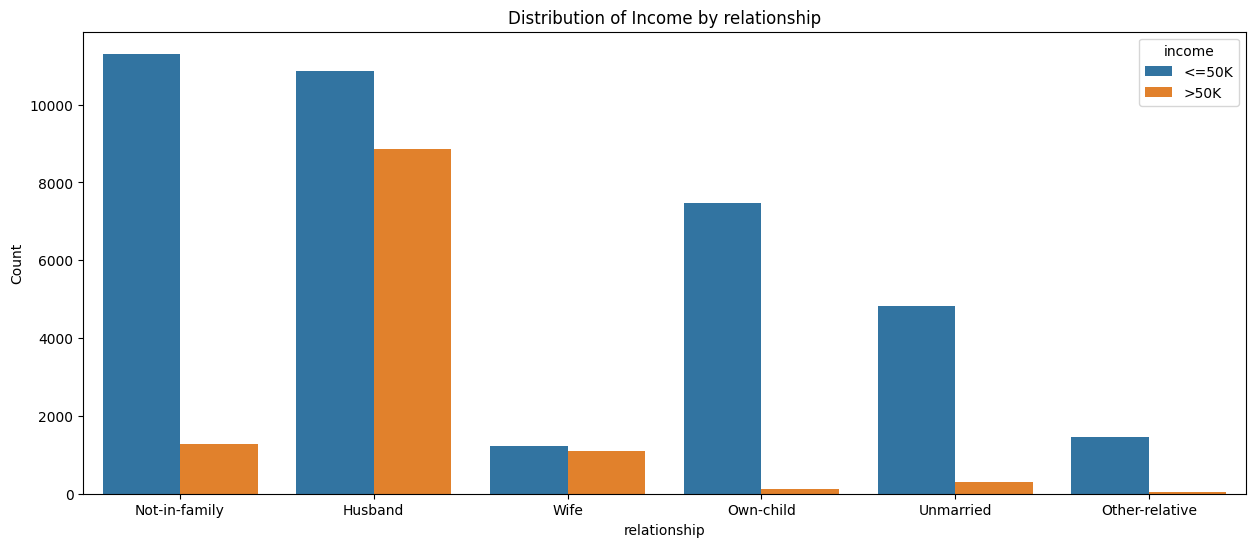

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="relationship", hue="income", data=data)

plt.xlabel("relationship")
plt.ylabel("Count")
plt.title("Distribution of Income by relationship")
plt.show()

In [ ]:
relationship_mapping={
    'Husband':0,
    'Not-in-family':1,
    'Own-child':2,
    'Unmarried':3,
    'Wife':4,
    'Other-relative':5
    }

In [ ]:
data['relationship'] = data['relationship'].map(relationship_mapping)

###Race

In [ ]:
print(data['race'].value_counts())

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


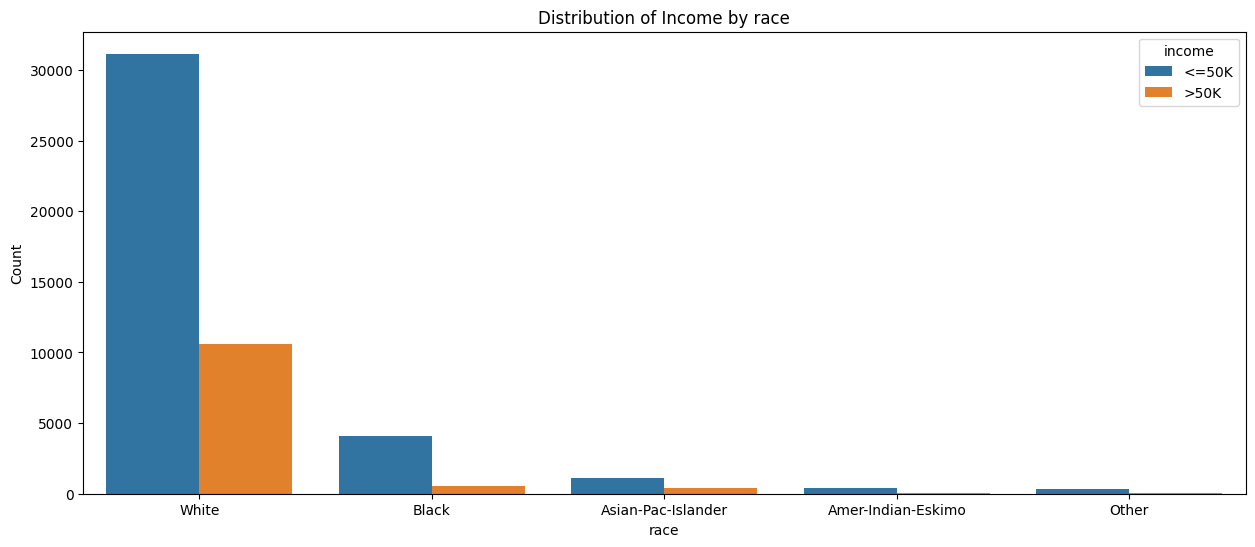

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="race", hue="income", data=data)

plt.xlabel("race")
plt.ylabel("Count")
plt.title("Distribution of Income by race")
plt.show()

In [ ]:
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
}

In [ ]:
data['race'] = data['race'].map(race_mapping)

###Native Country

In [ ]:
print(data['native-country'].value_counts())

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

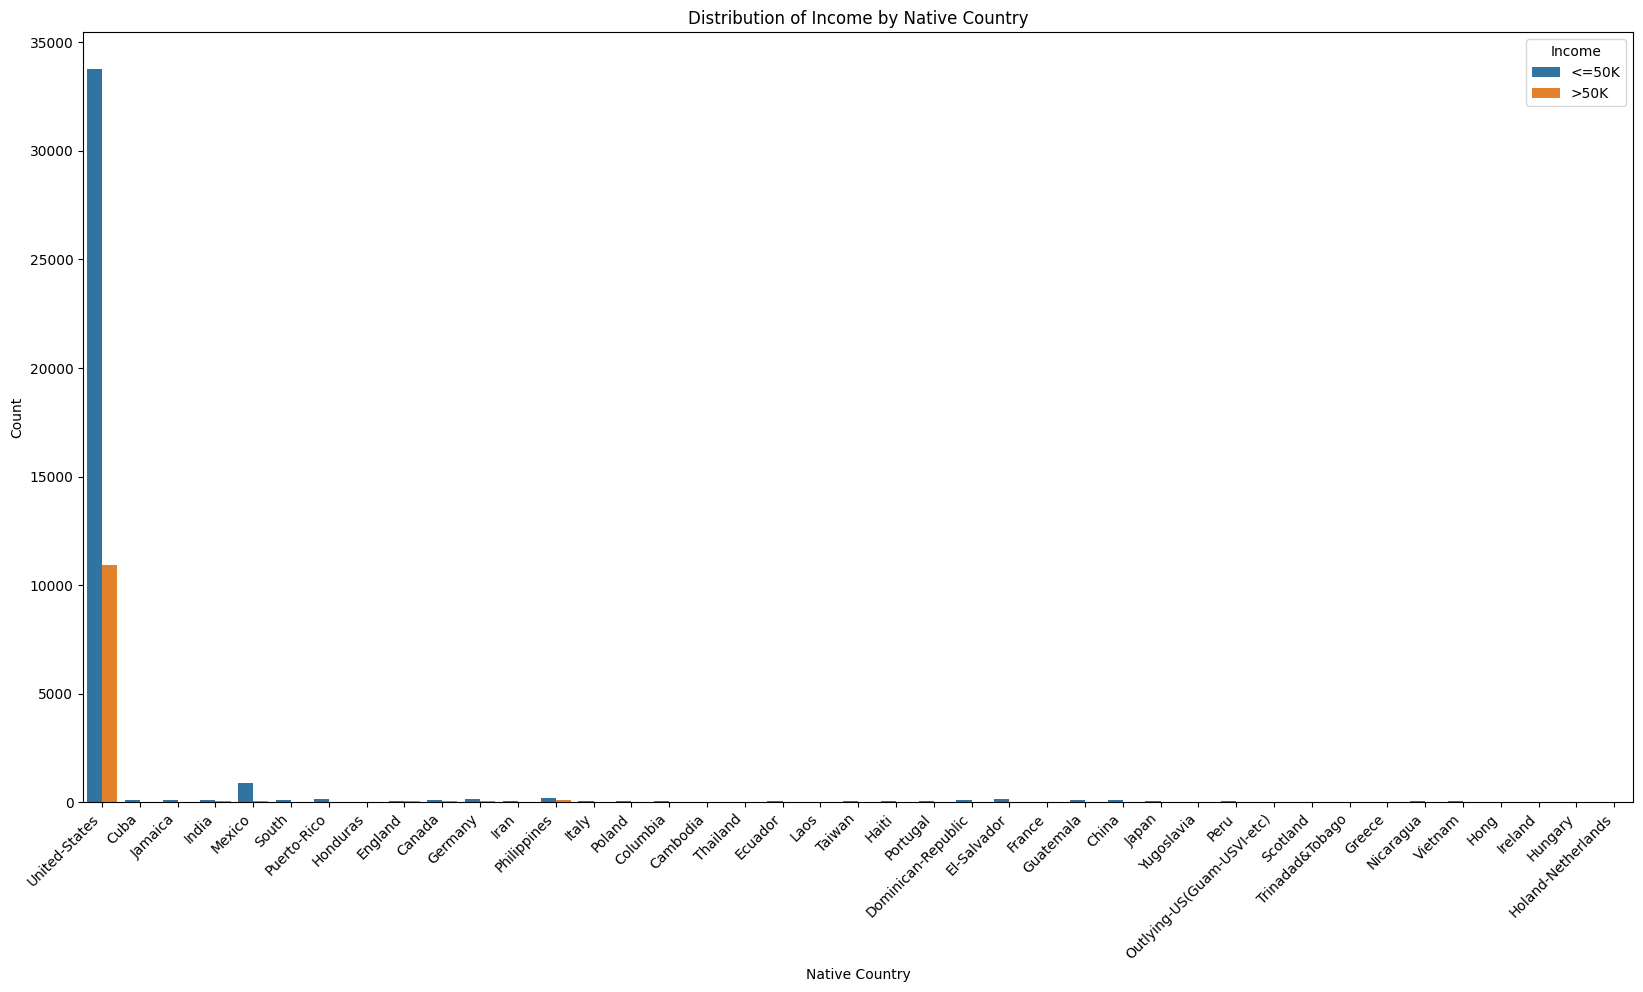

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x="native-country", hue="income", data=data)
plt.xlabel("Native Country")
plt.ylabel("Count")
plt.title("Distribution of Income by Native Country")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Income', loc='upper right')
plt.show()


In [ ]:
native_country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Canada': 4,
    'Puerto-Rico': 5,
    'El-Salvador': 6,
    'India': 7,
    'Cuba': 8,
    'England': 9,
    'Jamaica': 10,
    'South': 11,
    'China': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Vietnam': 15,
    'Guatemala': 16,
    'Japan': 17,
    'Poland': 18,
    'Columbia': 19,
    'Taiwan': 20,
    'Haiti': 21,
    'Iran': 22,
    'Portugal': 23,
    'Nicaragua': 24,
    'Peru': 25,
    'France': 26,
    'Greece': 27,
    'Ecuador': 28,
    'Ireland': 29,
    'Hong': 30,
    'Cambodia': 31,
    'Trinadad&Tobago': 32,
    'Laos': 33,
    'Thailand': 34,
    'Yugoslavia': 35,
    'Outlying-US(Guam-USVI-etc)': 36,
    'Honduras': 37,
    'Hungary': 38,
    'Scotland': 39,
    'Holand-Netherlands': 40
}

In [ ]:
data['native-country'] = data['native-country'].map(native_country_mapping)

###Sex

In [ ]:
print(data['sex'].value_counts())

Male      32650
Female    16192
Name: sex, dtype: int64


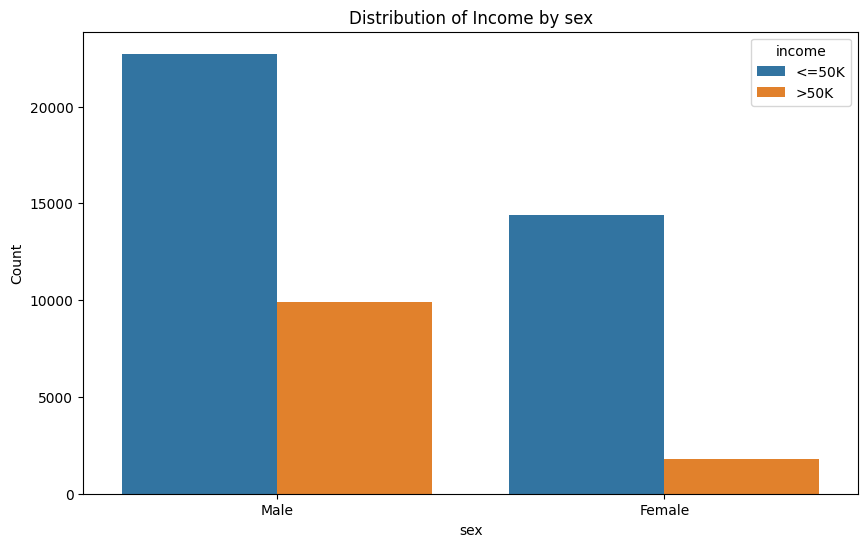

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex", hue="income", data=data)

plt.xlabel("sex")
plt.ylabel("Count")
plt.title("Distribution of Income by sex")
plt.show()

In [ ]:
data['sex']= data['sex'].apply(lambda x:0 if x == 'Male' else 1)
#Male =1 Female =0

###Income

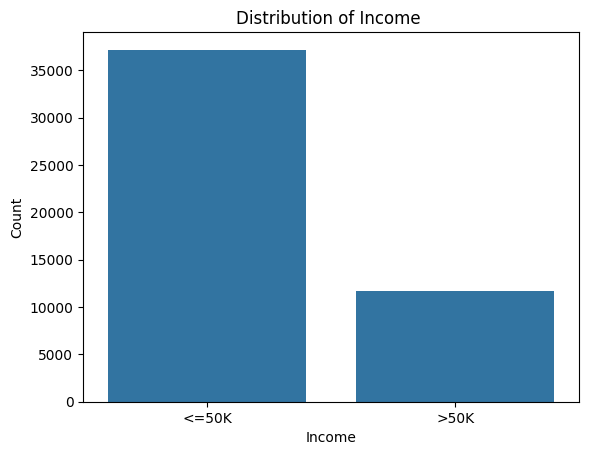

In [ ]:
sns.countplot(x='income', data=data)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income ")
plt.show()

In [ ]:
print(data['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [ ]:
data['income']= data['income'].apply(lambda x:0 if x == '<=50K' else 1)
data["income"]

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

##Rest

<Axes: >

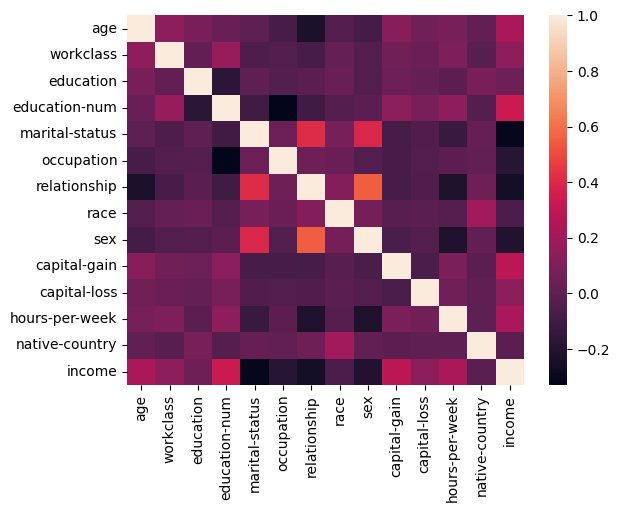

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,3,13,1,4,1,0,0,7.684784,0.0,40,0,0
1,50,2,3,13,0,1,0,0,0,0.000000,0.0,13,0,0
2,38,1,1,9,2,8,1,0,0,0.000000,0.0,40,0,0
3,53,1,6,7,0,8,0,1,0,0.000000,0.0,40,0,0
4,28,1,3,13,0,0,4,1,1,0.000000,0.0,40,8,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train_Scaled = scalar.fit_transform(data)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


naive_bayes_model = GaussianNB()

# Fit the Naive Bayes model to the oversampled training data
naive_bayes_model.fit(X_train_smote, y_train_smote)

# Generate predictions on the original test data
y_pred_nb_smote = naive_bayes_model.predict(X_test)

# Print classification report for Naive Bayes with SMOTE
print("\nNaive Bayes Model :")
print(classification_report(y_test, y_pred_nb_smote))



Naive Bayes Model :
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     11109
           1       0.49      0.77      0.60      3544

    accuracy                           0.75     14653
   macro avg       0.70      0.76      0.71     14653
weighted avg       0.81      0.75      0.77     14653



In [ ]:
# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model
print("\nRandom Forest Model :")
print(classification_report(y_test, y_pred_rf))



Random Forest Model :
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11109
           1       0.62      0.72      0.66      3544

    accuracy                           0.82     14653
   macro avg       0.76      0.79      0.77     14653
weighted avg       0.84      0.82      0.83     14653

